# Model Training

## Data Preprocessing

Mounting google drive

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

Loading Dataset

In [49]:
# Loading dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/telescope/dataset.csv")

In [50]:
print(data)

    Demand  Supply
0       10      15
1       19      23
2       20      25
3       28      32
4       33      38
..     ...     ...
95      37      41
96      44      50
97      34      38
98      10      14
99      20      24

[100 rows x 2 columns]


Splitting feature and target from dataset

In [51]:
X = data[['Demand']]

In [52]:
print(X)

    Demand
0       10
1       19
2       20
3       28
4       33
..     ...
95      37
96      44
97      34
98      10
99      20

[100 rows x 1 columns]


In [53]:
Y = data[['Supply']]

In [54]:
print(Y)

    Supply
0       15
1       23
2       25
3       32
4       38
..     ...
95      41
96      50
97      38
98      14
99      24

[100 rows x 1 columns]


Plotting dataset

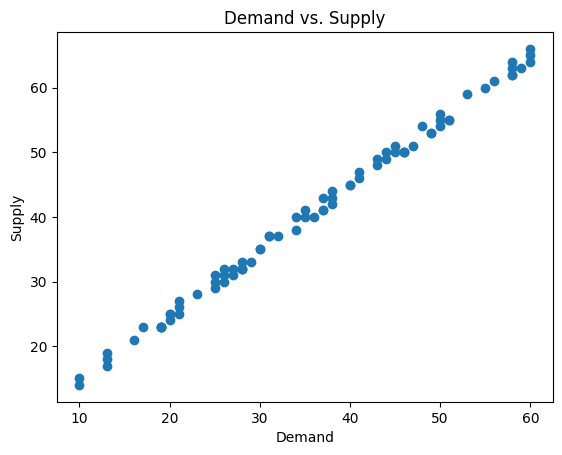

In [57]:
plt.scatter(X_train, y_train)
plt.xlabel("Demand")
plt.ylabel("Supply")
plt.title("Demand vs. Supply")
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [61]:
print(X_test);

    Demand
83      57
53      13
70      40
45      24
44      45
39      17
22      23
80      59
10      36
0       10
18      25
30      24
73      34
33      36
90      60
4       33
76      10
77      46
12      53
31      49


In [62]:
print(y_test);

    Supply
83      63
53      17
70      46
45      29
44      51
39      23
22      29
80      64
10      41
0       15
18      31
30      28
73      40
33      40
90      64
4       38
76      14
77      51
12      59
31      55


In [63]:
print(X_train);

    Demand
55      13
88      25
26      47
42      38
69      20
..     ...
60      50
71      40
14      45
92      28
51      43

[80 rows x 1 columns]


In [64]:
print(y_train);

    Supply
55      18
88      31
26      51
42      42
69      25
..     ...
60      56
71      45
14      51
92      32
51      49

[80 rows x 1 columns]


## Model Training

Initializing algoritham for training model

In [65]:
model = LinearRegression()

Model Training

In [66]:
model.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)
print(y_pred);

[[61.88108544]
 [17.790891  ]
 [44.84623759]
 [28.81343961]
 [49.85648695]
 [21.7990905 ]
 [27.81138974]
 [63.88518518]
 [40.83803809]
 [14.78474138]
 [29.81548948]
 [28.81343961]
 [38.83393834]
 [40.83803809]
 [64.88723506]
 [37.83188847]
 [14.78474138]
 [50.85853683]
 [57.87288594]
 [53.86468645]]


## Model Testing

In [89]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Predicted Value: 0.7760612577154136


In [92]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.7814579738246633


In [93]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.2f}")

R-squared (R2) Score: 1.00


In [70]:
# Save the model to a file
model_filename = "/content/drive/MyDrive/Colab Notebooks/telescope/supply_predict_model.pkl"
joblib.dump(model, model_filename)

['/content/drive/MyDrive/Colab Notebooks/telescope/supply_predict_model.pkl']

# Simple Python Console Application for manuel testing the trained model  

## Loading Model

In [79]:
loaded_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/telescope/supply_predict_model.pkl")

## Testing model

In [80]:
user_input = np.array([[20]])

In [81]:
prediction = loaded_model.predict(user_input)
print(f"Predicted Value: {prediction[0]}")

Predicted Value: [24.80524012]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
